In [1]:
%load_ext autoreload
%autoreload 2
from FIFOv2 import FIFO 
import matplotlib.pyplot as plt
import numpy as np
import math
from spcm import units
import spcm as spcm
import time as time
from time import sleep 
# import API classes into the current namespace
from pulsestreamer import PulseStreamer, Sequence 
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# Coself.samplesself.samplesect to Pulse Streamer
ip = '10.135.70.193' 
ps = PulseStreamer(ip)

Connect to Pulse Streamer via JSON-RPC.
IP / Hostname: 10.135.70.193
Pulse Streamer 8/2 firmware: v1.5.2
Client software: v1.7.0
Your client software is more up to date than the Pulse Streamer 8/2 firmware. We recommend updating the firmware of your Pulse Streamer 8/2.
For detailed information visit https://www.swabianinstruments.com/pulse-streamer-8-2/downloads/ or contact support@swabianinstruments.com


In [3]:
seq1=ps.createSequence()

In [4]:
# creating the arbitrary wave to measure
pattern=[(200,0),(100,1),(3000-200-100,0)]#,(300,1),(500,0),(400,1),(500,0),(10000000000,0),(500,1),(100,0)]
# seq1.setAnalog(0,pattern)
seq1.setDigital(5,pattern*8)
# create the trigger signal -- square wave 

pattern_trigger=[(100,1),(100,0), (3000-100-100,0)] #,(500,0.5),(700,0),(100,1.6),(10,0),(10000000000,0),(500,1),(100,0)]

seq1.setDigital(1,pattern_trigger*8) # assing the trigger to the same sequence as the simulated wave
# seq1.setAnalog(0,pattern)

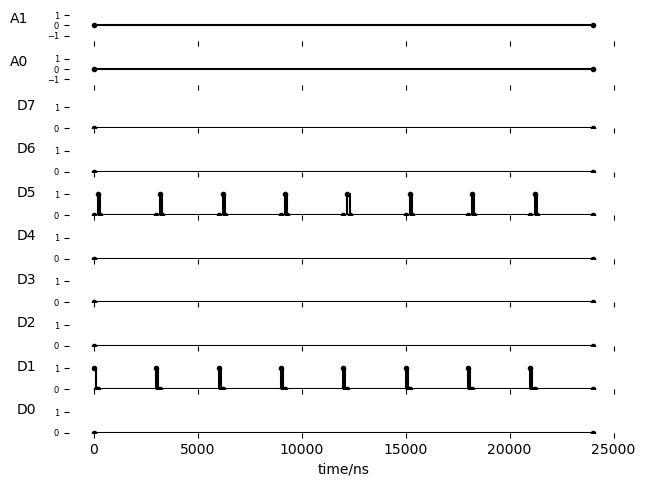

In [5]:
seq1.plot()

In [6]:
# Creating an instance of the digiziter class
# You are required to pass the IP address of the digitizer 
# If the IP changes, you can find it in the spectrum controls app on the desktop

FIFO = FIFO('dev/spcm0')

# Creating an instance of the class will call the connect function 
# and establish the connection with the digitizer 
# If the connection is unsuccessful, it will print, "Connection unsuccessful"

Successfully connected to the digitizer


In [7]:
# To set the configuration, make a dictionary with the key and value
num_iters=12
config1={'num_samples' :None,
         'runs': 4,
         'readout_ch' :0,
         'num_pts_in_exp':2,
         'num_iters':num_iters}

In [8]:
# Assign_param takes the configuration and gives it to the class dictionary 

FIFO.assign_param(config1)

In [9]:
FIFO.config()

SETTINGS: card timeout =  20 s
SETTINGS: # segments =  512 Sa
SETTINGS: sampling freq =  0.5 GHz


In [10]:
n_runs = PulseStreamer.REPEAT_INFINITELY
ps.stream(seq1, n_runs)


In [11]:
for i in range(1,4):
    print(i)

1
2
3


SETTINGS: card timeout =  20 s
SETTINGS: # segments =  512 Sa
SETTINGS: sampling freq =  0.5 GHz
(8, 512, 1)
(4, 512, 1)
Card stopped


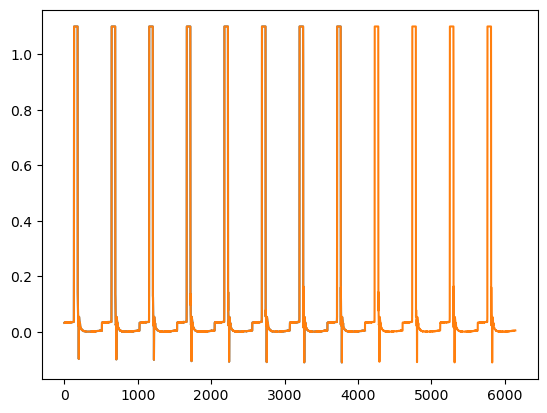

In [12]:
FIFO.config()
FIFO.start_buffer()

archive=[]

for i in range(2):
    temp=list(FIFO.acquire())
    archive+=temp
    plt.plot(archive)

FIFO.stop_card()
FIFO.reset()


In [13]:
np.min(temp[0:150])

0.032128906250000006

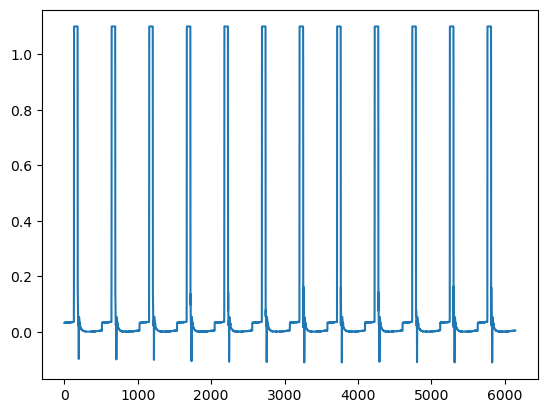

In [14]:
plt.plot(archive)

In [15]:
temp[0]

0.032861328125000006

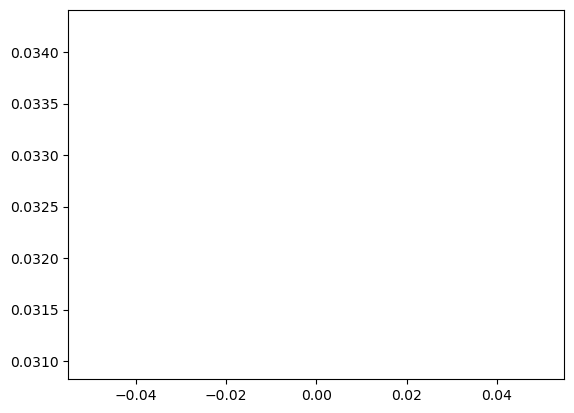

In [16]:
plt.plot(temp[1])

In [17]:
temp2=np.ravel(temp)

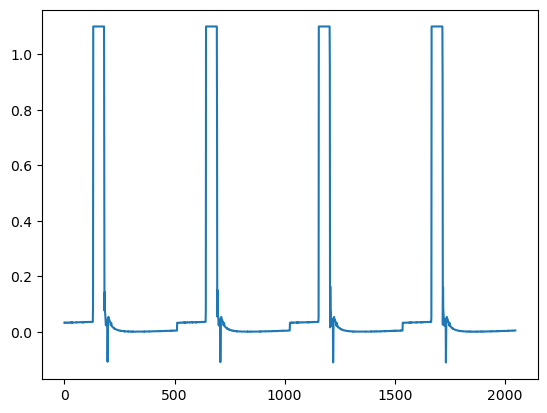

In [18]:
plt.plot(temp2)

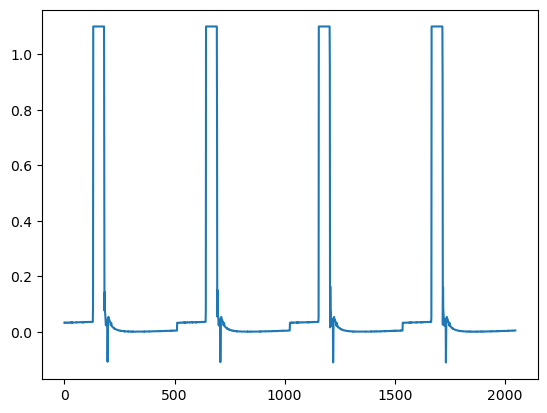

In [19]:
plt.plot(temp2)

In [20]:
ps.forceFinal()

0

In [21]:
######################################################

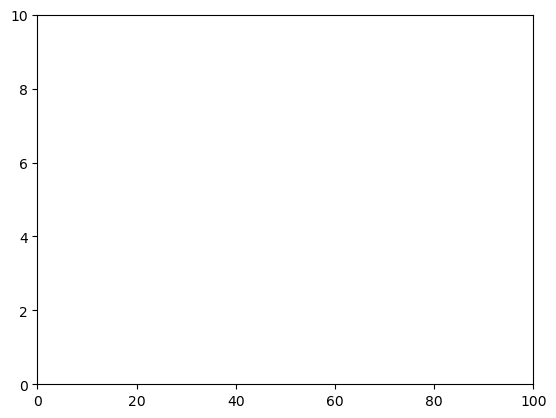

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Initialize empty lists or arrays to hold data points
x_data, y_data = [], []

# Create a figure and axis for plotting
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

# Set axis limits
ax.set_xlim(0, 100)  # x-axis range (e.g., time or index)
ax.set_ylim(0, 10)   # y-axis range (e.g., sensor readings)

# Function to initialize the plot
def init():
    line.set_data([], [])
    return line,

# Function to update the plot with new data
def update(frame):
    # Here, frame can be a new data point or time step
    # Simulating real-time data input
    x_data.append(frame)  # For example, appending the frame number
    y_data.append(np.random.random() * 10)  # Random data point (replace with your real data source)

    # Keep only the most recent 100 points (for example)
    x_data = x_data[-100:]
    y_data = y_data[-100:]

    line.set_data(x_data, y_data)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(100), init_func=init, blit=True, interval=100)

# Show the plot
plt.show()
